In [1]:
from binance_f.requestclient import RequestClient
from binance_f.constant.test import *
from binance_f.base.printobject import *
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='whitegrid')

In [2]:
request_client = RequestClient()
result = request_client.get_global_long_short_accounts(symbol='ETHUSDT', period='5m', limit=100)

[{"symbol":"ETHUSDT","longAccount":"0.7101","longShortRatio":"2.4495","shortAccount":"0.2899","timestamp":1636089000000},{"symbol":"ETHUSDT","longAccount":"0.7104","longShortRatio":"2.4530","shortAccount":"0.2896","timestamp":1636089300000},{"symbol":"ETHUSDT","longAccount":"0.7101","longShortRatio":"2.4495","shortAccount":"0.2899","timestamp":1636089600000},{"symbol":"ETHUSDT","longAccount":"0.7106","longShortRatio":"2.4554","shortAccount":"0.2894","timestamp":1636089900000},{"symbol":"ETHUSDT","longAccount":"0.7109","longShortRatio":"2.4590","shortAccount":"0.2891","timestamp":1636090200000},{"symbol":"ETHUSDT","longAccount":"0.7112","longShortRatio":"2.4626","shortAccount":"0.2888","timestamp":1636090500000},{"symbol":"ETHUSDT","longAccount":"0.7109","longShortRatio":"2.4590","shortAccount":"0.2891","timestamp":1636090800000},{"symbol":"ETHUSDT","longAccount":"0.7111","longShortRatio":"2.4614","shortAccount":"0.2889","timestamp":1636091100000},{"symbol":"ETHUSDT","longAccount":"0.71

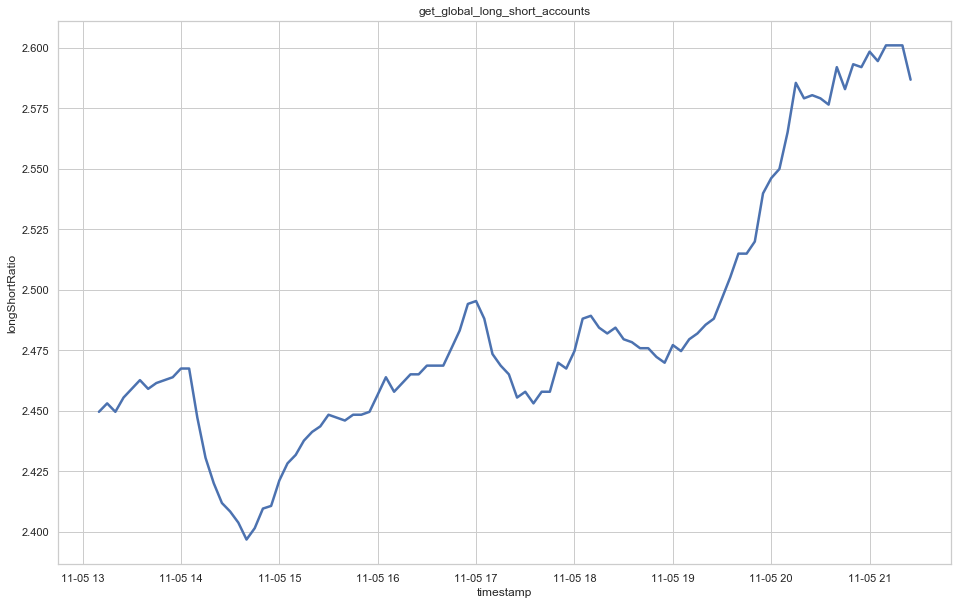

In [3]:
def timeStamp(timeNum): 
    timeStamp = float(timeNum/1000) 
    timeArray = time.localtime(timeStamp) 
    otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", timeArray)
    return otherStyleTime
df = pd.DataFrame(t.__dict__ for t in result)
df['timestamp'] = df['timestamp'].apply(lambda x :timeStamp(int(x))).astype('datetime64[ns]')
df.set_index('timestamp', inplace=True)
plt.figure(figsize=(16,10))
plt.title('get_global_long_short_accounts')
sns.lineplot(data=df['longShortRatio'], palette='tab10', linewidth=2.5)